In [ ]:
# Linear Regression

In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Importing the dataset
df = pd.read_csv('flats_prep.csv', sep=';')

In [3]:
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,50,1,35000.0
1,1.0,0,0,37,1,35000.0
2,3.0,1,0,67,1,65000.0
3,2.0,1,0,21,1,15000.0
4,1.0,1,0,82,0,60000.0
...,...,...,...,...,...,...
212,2.0,0,1,65,0,46407.0
213,3.0,0,1,84,0,57678.0
214,3.0,0,1,93,0,63513.0
215,2.0,0,1,72,0,51121.0


In [4]:
# Cheking correlations
df.corr()

,rooms,location,condition,m2,type,price
rooms,1.000000,-0.060645,-0.342692,0.738398,0.272505,0.594447
location,-0.060645,1.000000,-0.122117,-0.288718,0.109806,-0.316291
condition,-0.342692,-0.122117,1.000000,-0.082482,-0.769335,-0.163575
m2,0.738398,-0.288718,-0.082482,1.000000,-0.043620,0.885215
type,0.272505,0.109806,-0.769335,-0.043620,1.000000,0.020591
price,0.594447,-0.316291,-0.163575,0.885215,0.020591,1.000000


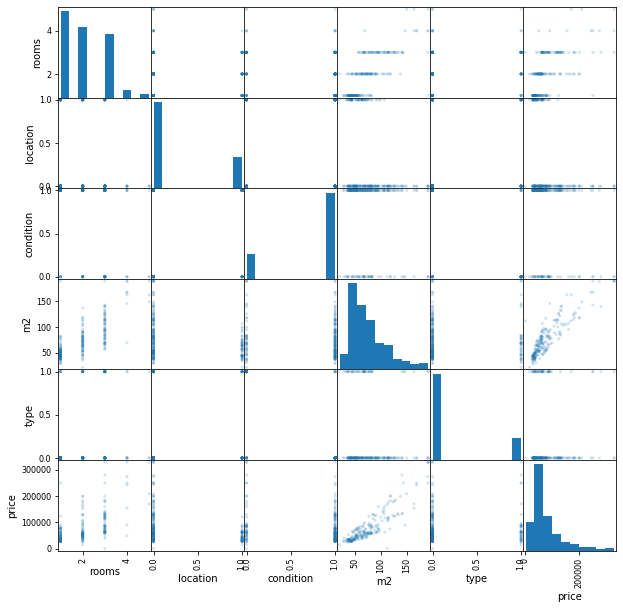

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [22]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Fitting Simple Linear Regression to the Training set (M2)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 3:4], y_train)

In [7]:
# Getting parameters
sr.coef_, sr.intercept_

(array([1508.56421886]), -36106.702307992935)

In [24]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 3:4])

In [9]:
# Coefficient of determination R^2
sr.score(X_train[:, 3:4], y_train), sr.score(X_test[:, 3:4], y_test)

(0.7872201542559246, 0.7311991996529543)

In [25]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(846515564.358048, 459102013.27191734)

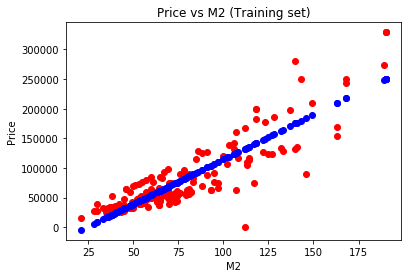

In [13]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], sr.predict(X_train[:, 3:4]), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

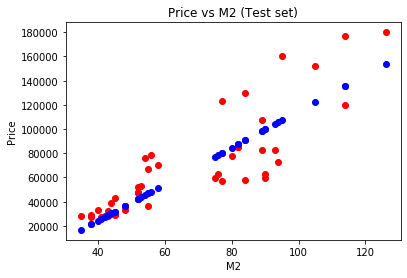

In [14]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sr.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [26]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [70]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-11699.52495304,  -7845.14536414, -16008.41803329,   1695.68033309,
          6254.7393622 ]),
 -13108.21121704494)

In [27]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [73]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.8106927187926689, 0.8208439234294531)

In [28]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(753133171.1794584, 305992077.91510516)

In [74]:
# p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues
#mr1.summary()

array([2.19045081e-01, 1.60819904e-03, 1.27269613e-01, 4.94901888e-02,
       9.39294854e-40, 4.56513323e-01])

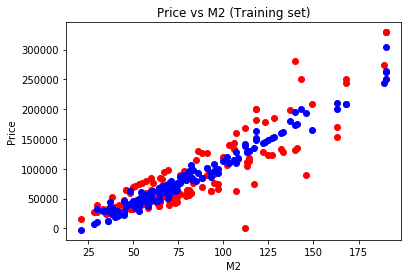

In [19]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], mr.predict(X_train), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

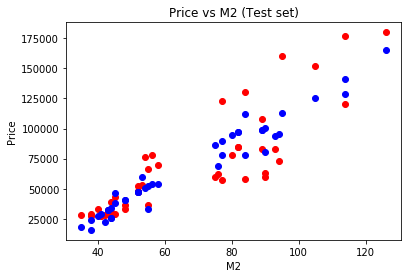

In [20]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], mr.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [14]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 3:4])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 3:4])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [14]:
# Getting parameters
pr.coef_, pr.intercept_

(array([158.05071132,   6.75702175]), 18785.27193613172)

In [15]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [16]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.8218549974270769, 0.7080453786249812)

In [16]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(708725569.6762003, 498647899.42685413)

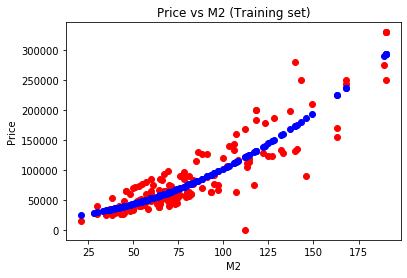

In [25]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

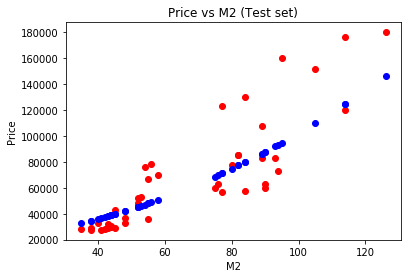

In [26]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [28]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [31]:
X_Modeled

array([[  3.,   0.,   1., 140.],
       [  1.,   1.,   1.,  41.],
       [  3.,   0.,   1., 106.],
       [  3.,   0.,   0.,  78.],
       [  3.,   0.,   1.,  95.],
       [  3.,   0.,   0.,  70.],
       [  3.,   0.,   0., 118.],
       [  1.,   1.,   0.,  82.],
       [  3.,   0.,   1.,  88.],
       [  3.,   0.,   1., 127.],
       [  3.,   1.,   1.,  69.],
       [  1.,   1.,   1.,  44.],
       [  3.,   0.,   0.,  76.],
       [  2.,   1.,   1.,  64.],
       [  1.,   0.,   1.,  46.],
       [  2.,   0.,   1.,  40.],
       [  3.,   0.,   1.,  88.],
       [  1.,   1.,   1.,  42.],
       [  3.,   1.,   1., 107.],
       [  1.,   1.,   1.,  41.],
       [  4.,   0.,   0., 146.],
       [  2.,   0.,   0.,  35.],
       [  1.,   0.,   1.,  30.],
       [  2.,   0.,   1.,  79.],
       [  3.,   0.,   0.,  68.],
       [  1.,   0.,   1.,  50.],
       [  1.,   0.,   1.,  66.],
       [  1.,   0.,   0., 190.],
       [  1.,   0.,   1.,  49.],
       [  1.,   0.,   1.,  48.],
       [  

In [17]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 0:4], y_train)

In [36]:
# Getting parameters
omr.coef_, omr.intercept_

(array([-11060.65680349,  -8092.5842503 , -20423.7590526 ,   1674.95218774]),
 -7988.89098065703)

In [18]:
# Predicting the Test set results
y_pred = omr.predict(X_test[:, 0:4])

In [38]:
# Coefficient of determination R^2
omr.score(X_train[:, 0:4], y_train), omr.score(X_test[:, 0:4], y_test)

(0.8100612955370429, 0.8287517619676935)

In [19]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 0:4])), mean_squared_error(y_test, y_pred)

(755645202.3904784, 292485776.63606113)

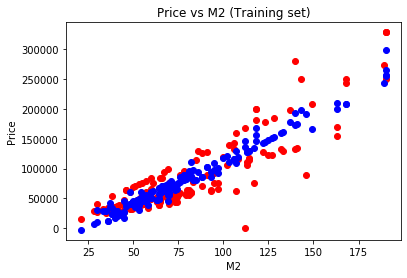

In [39]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], omr.predict(X_train[:, 0:4]), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

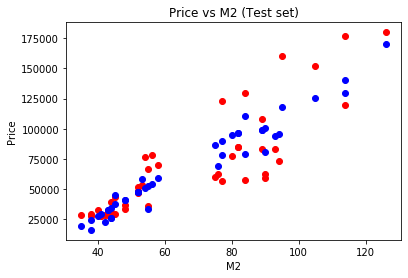

In [40]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], omr.predict(X_test[:, 0:4]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()